In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [160]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001 or 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
# drop Relevant? == 0
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

# filter out parallel algorithms
approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

approximation_algorithms.sort_values(by=['Family Name', 'Variation', 'Year'], inplace=True)

approximation_algorithms


,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?
153,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Aingworth, Chekuri, Indyk, Motwani",1999.0,5.50,99999.0,2.00,additive,no,NaN,0,0.0
154,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_2]",2000.0,5.33,99999.0,2.00,additive,no,NaN,0,0.0
155,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_k]",2000.0,5.01,99999.0,3.00,additive,yes,NaN,0,0.0
156,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Dor, Halperin, Zwick [APASP_infty]",2000.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0
157,All-Pairs Shortest Paths (APSP),1,1,"APSP, unweighted, undirected, no FMM (Approxim...","Deng, Kirkpatrick, Rong, V. Williams, Zhong",2022.0,5.29,99999.0,2.00,additive,no,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...","Biswas, Raman, Saurabh",2020.0,8.00,3.0,99999.00,multiplicative,no,NaN,0,0.0
772,The Vertex Cover Problem,1,1,"The Vertex Cover Size Problem, Sparse (Approxi...",Behnezhad [Theorem 1.3],2021.0,4.00,3.0,5.99,multiplicative-additive,yes,NaN,0,0.0
918,Wiener Index,1,1,Minimum Wiener Connector problem,NaN,2008.0,5.50,2.0,99999.00,multiplicative,yes,FPTAS,0,0.0
917,Wiener Index,1,1,Minimum Wiener Connector problem,Ruchansky,2015.0,5.01,4.0,99999.00,multiplicative,no,NaN,0,0.0


In [161]:
# read sheet1
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?'
]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(approximation_algorithms['Family Name'])]

sheet1



,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Approximate?,Parallel?,Quantum?
0,Optimal Binary Search Trees,2.0,Approximate OBST,Melhorn's Approximation algorithm,1975.0,3.000,1.0,0,0.0
2,Optimal Binary Search Trees,2.0,Alphabetic Tree Problem,Klawe; Mumey,1993.0,3.000,0.0,0,0.0
3,Optimal Binary Search Trees,2.0,Approximate OBST,Larmore,1987.0,4.600,1.0,0,0.0
4,Nearest Neighbor Search,2.0,k-ANNS,Hierarchical Navigable Small World (HNSW),2018.0,4.000,1.0,0,0.0
5,Nearest Neighbor Search,2.0,k-ANNS,Locality-sensitive hashing,2010.0,3.000,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...
926,Maximum Cut,2.0,"Maximum Cut, Approximate","Khuller; Raghavachari & Young, ""Greedy Methods""",2007.0,5.000,1.0,0,0.0
927,Maximum Cut,1.0,"Maximum Cut, Approximate","Goemans, Williamson",1995.0,6.010,1.0,0,0.0
929,Wiener Index,1.0,Minimum Wiener Connector problem,Ruchansky,2015.0,5.010,1.0,0,0.0
930,Determinant of Matrices with Integer Entries,2.0,Determinant of Matrices with Integer Entries,Bareiss algorithm,1968.0,5.520,0.0,0,0.0


In [162]:
colors = ['red', '#ff8a8a', '#5975A4']

def plot_family(family):
    df = pd.concat([approximation_algorithms, sheet1], axis=0)

    df = df[df['Family Name'] == family]

    # create column exact that is True if the algorithm have no Approximation Type
    df['Exact'] = df['Approximation Type (additive/multiplicative)'].isnull()

    # create a column Constant Factor that is True if the algorithm have Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
    df['Constant Factor'] = (df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | (df['Approximation Factor Class (Add)'].astype(float) <= 2) | df['Exact']
    # sort by year and time complexity
    df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)


    # plot Time Complexity Class vs Year
    exact = df[df['Exact']]
    constant_factor = df[df['Constant Factor']]
    approximate = df[df['Constant Factor'] == False]

    def fill_best(df, column="Time Complexity Class"):
        best = []
        last_best = 99999
        for index, row in df.iterrows():
            if row[column] < last_best:
                best.append(True)
                last_best = row[column]
            else:
                best.append(False)

        return best

    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    df['Best'] = fill_best(df)

    plt.figure(figsize=(6, 6))
    plt.scatter(approximate['Year'], approximate['Time Complexity Class'], label='Any reasonable error', color='#DD4444')
    plt.scatter(constant_factor['Year'], constant_factor['Time Complexity Class'], label='Constant-term/factor', color='#ff8a8a')
    plt.scatter(exact['Year'], exact['Time Complexity Class'], label='Exact', color='#5975A4')

    if len(approximate) > 0:
        best_approximate = df[df['Best']]
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        plt.step(best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='#DD4444')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat([best_constant_factor, last_row], ignore_index=True)
        plt.step(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], where='post', color='#ff8a8a')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        plt.step(best_exact['Year'], best_exact['Time Complexity Class'], where='post', color='#5975A4')


        


    plt.yticks(np.arange(1, 9, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial'])


    plt.xlabel('Year')
    plt.ylabel('Time Complexity Class')
    plt.legend()
    plt.title(family)
    plt.show()



In [163]:
# ceil and count time complextiy classes shee1
time = np.ceil(sheet1['Time Complexity Class'])
time = time.value_counts().sort_index()
time

Time Complexity Class
3.0    50
4.0    29
5.0    56
6.0    52
7.0    16
8.0    35
Name: count, dtype: int64

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


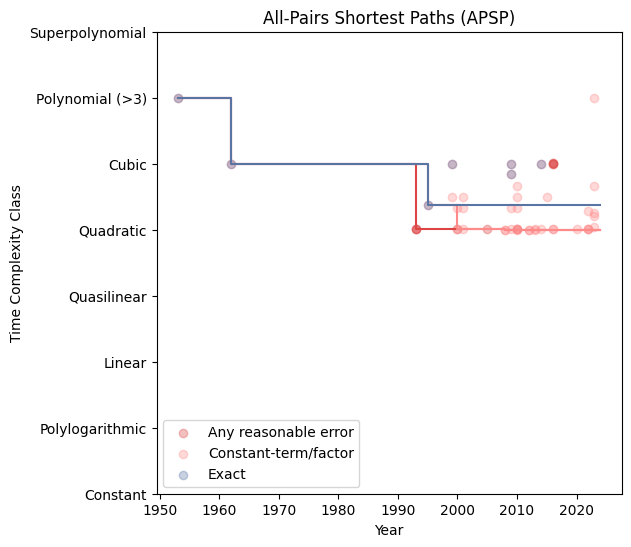

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


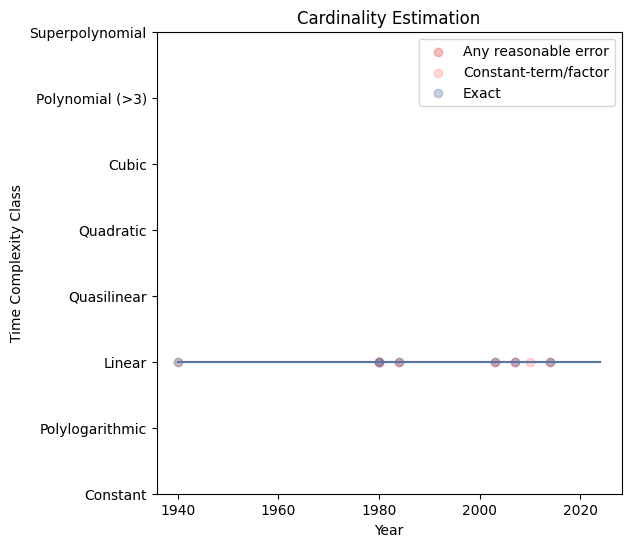

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


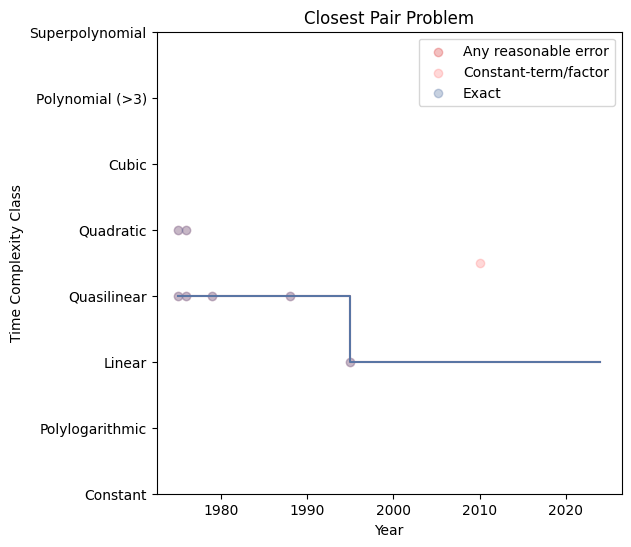

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


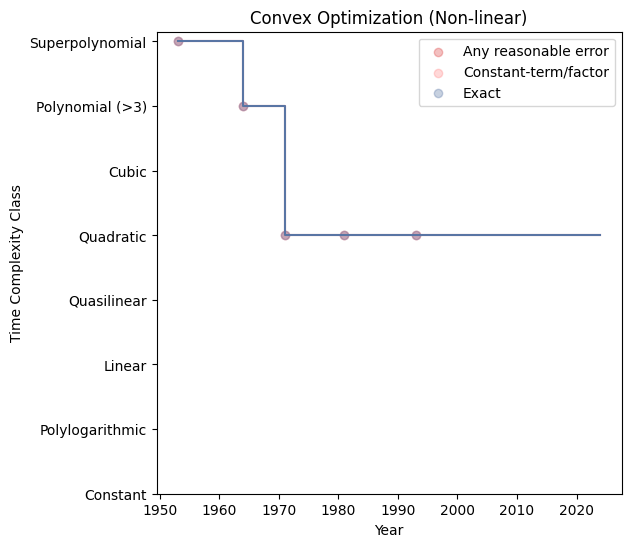

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


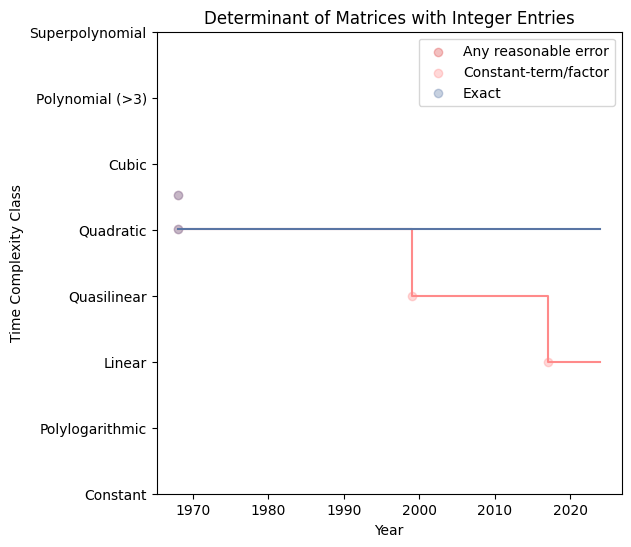

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


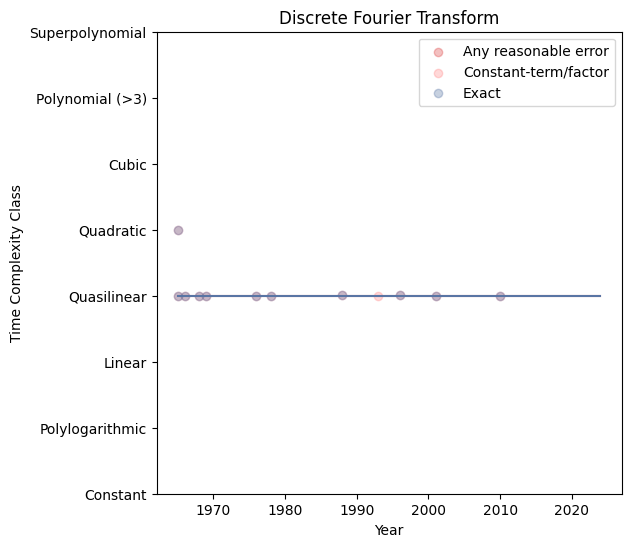

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


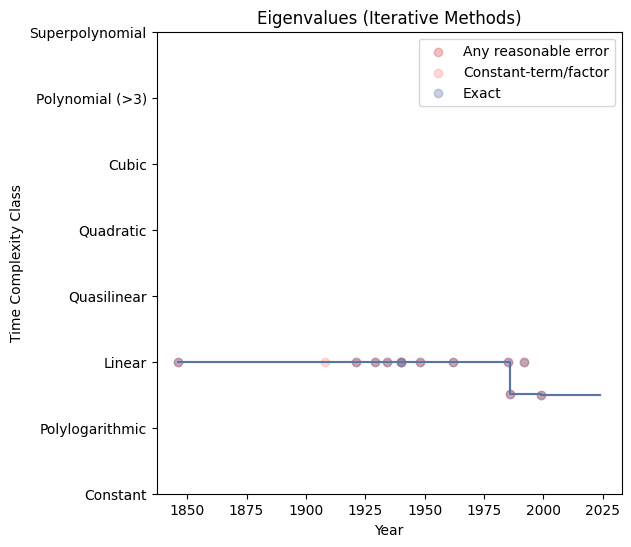

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


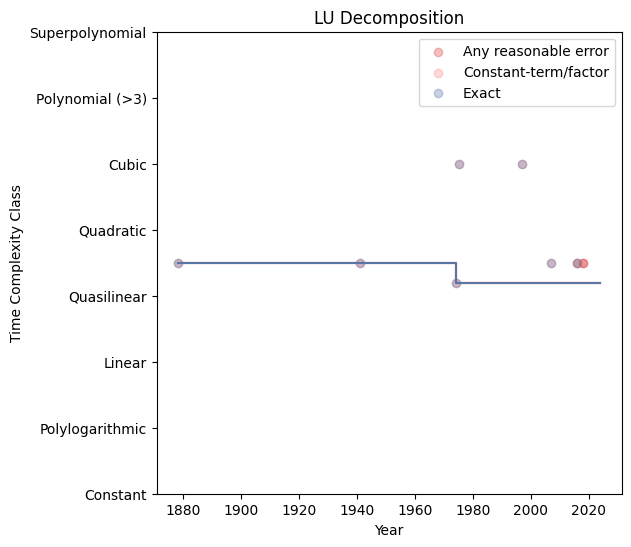

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


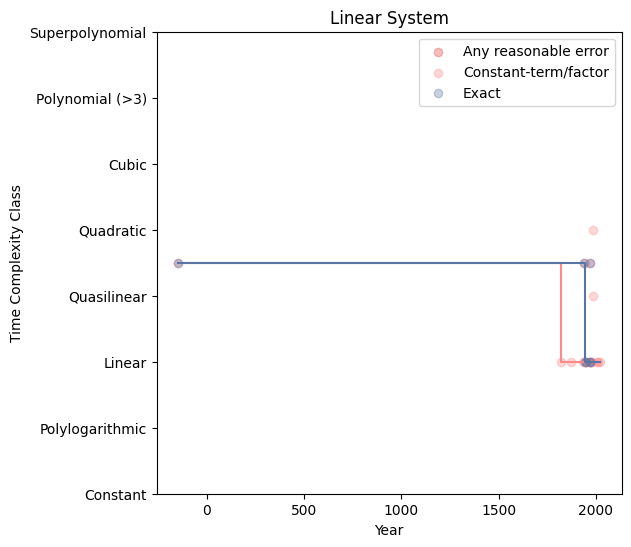

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


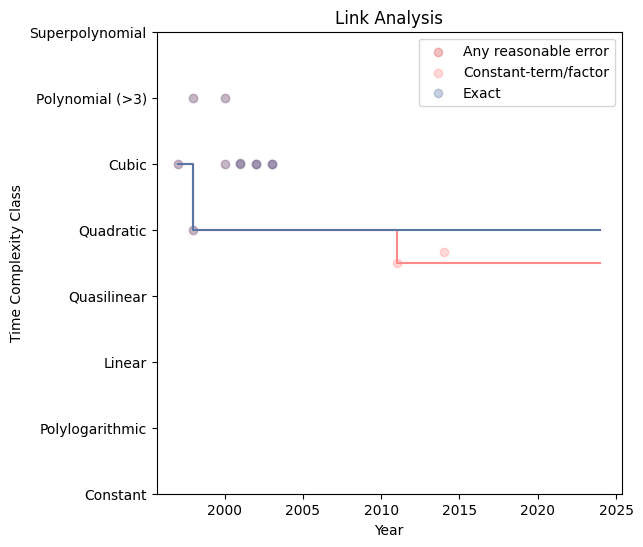

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


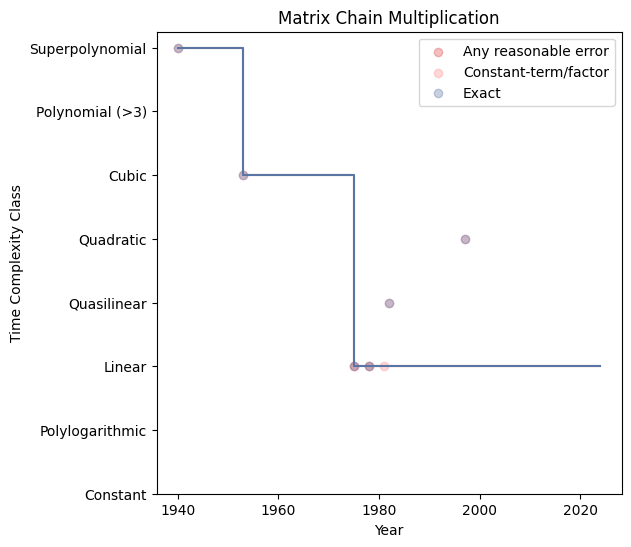

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


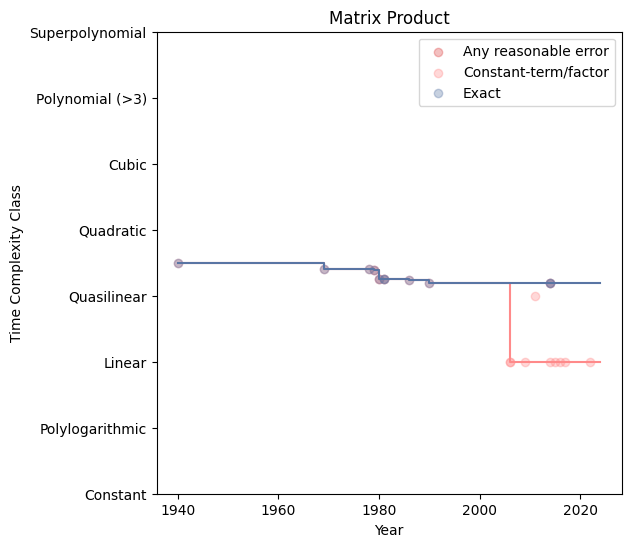

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


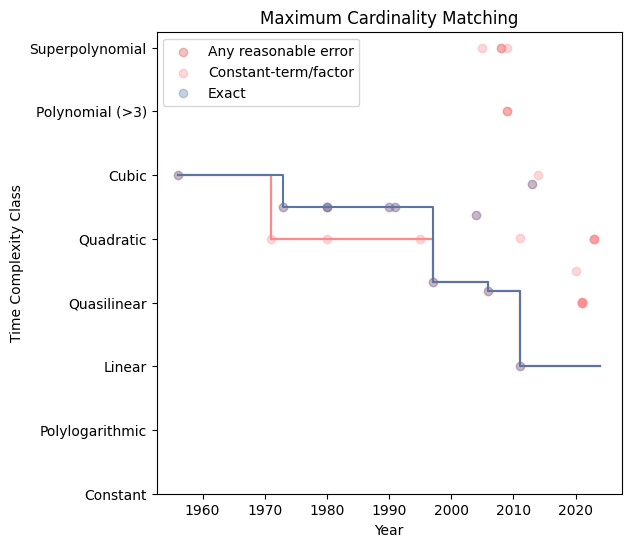

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


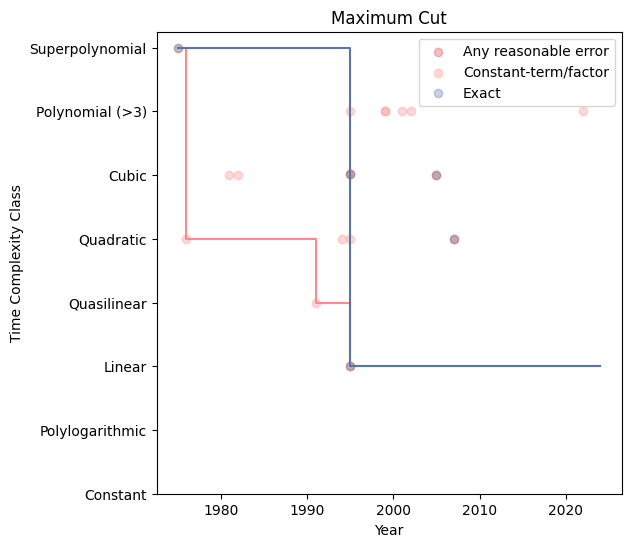

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


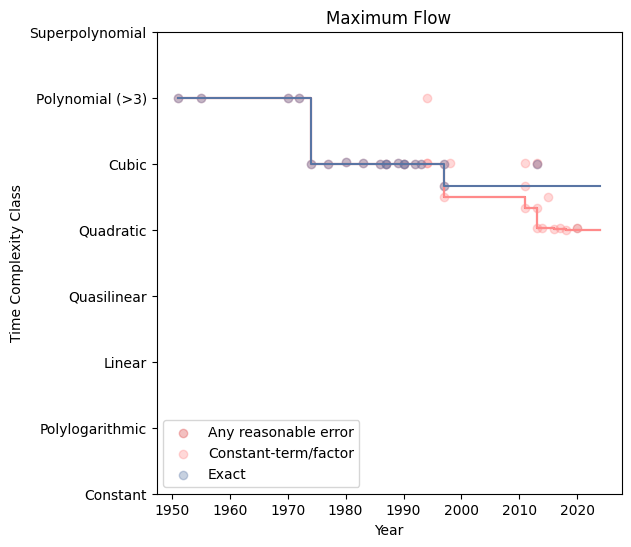

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


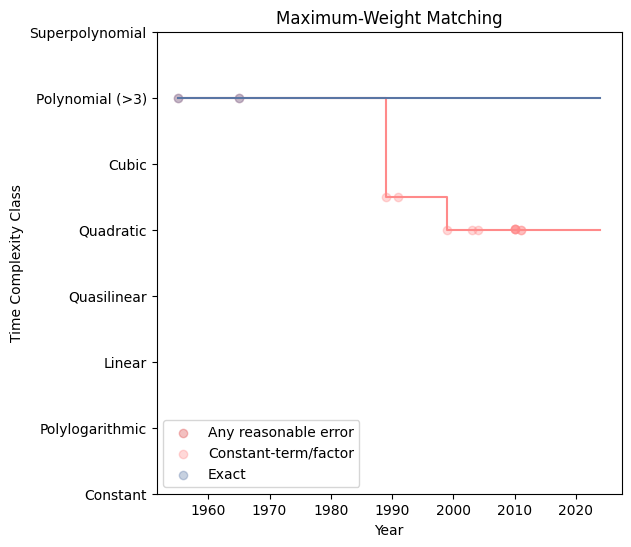

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


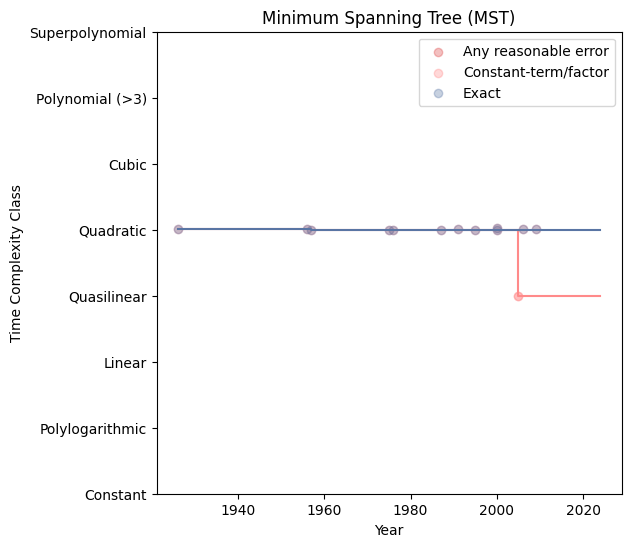

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


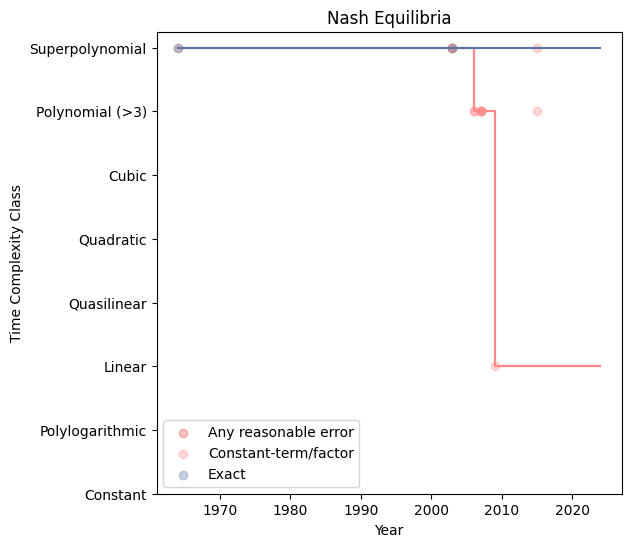

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


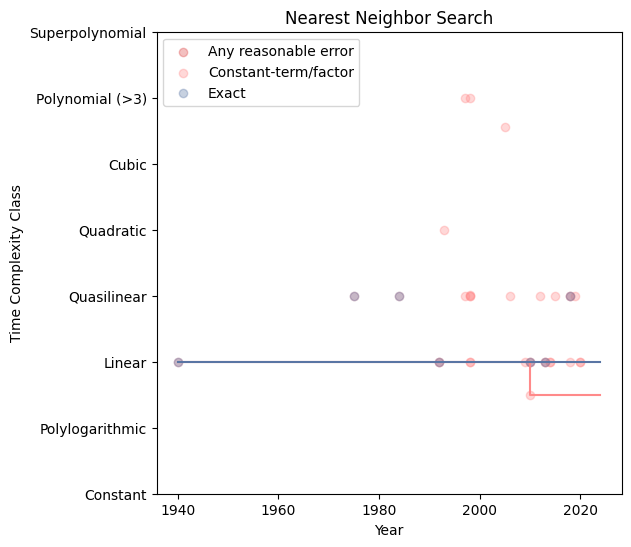

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


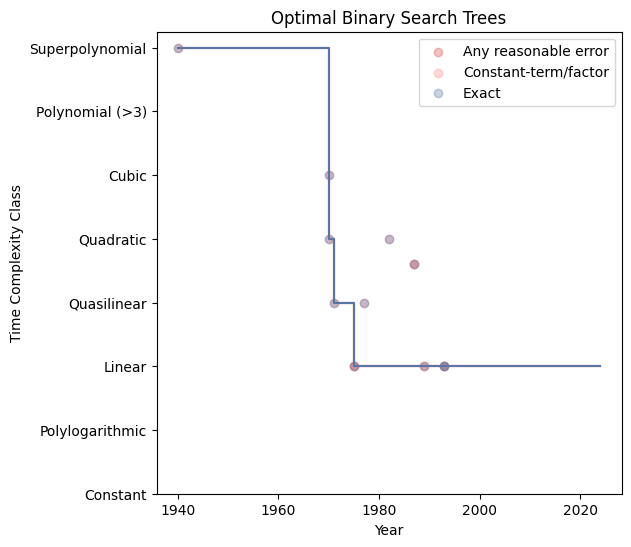

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


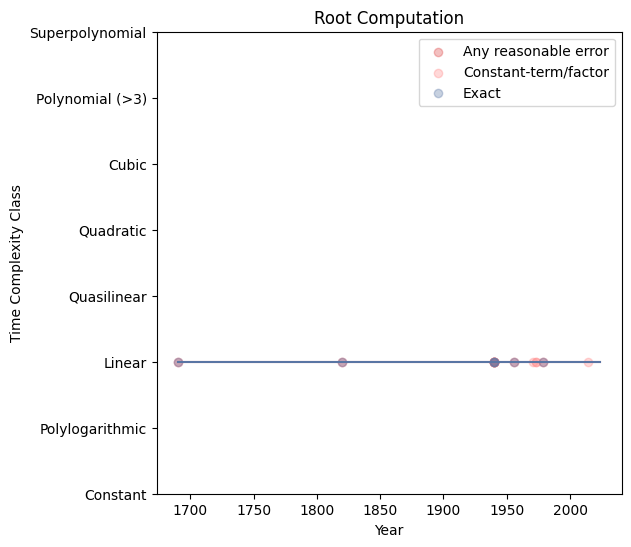

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


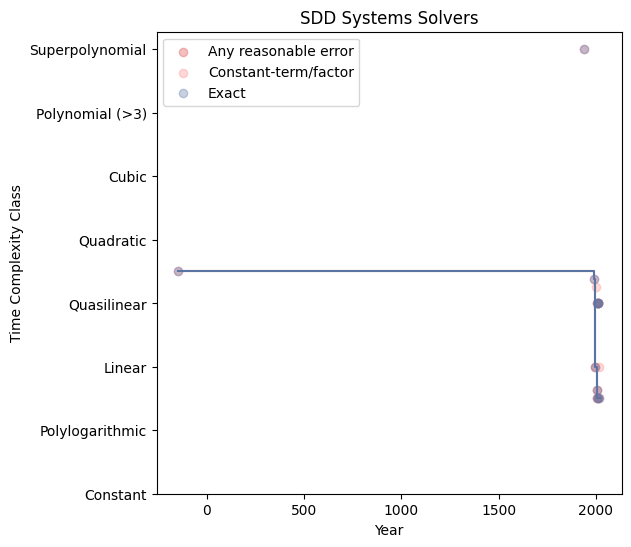

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


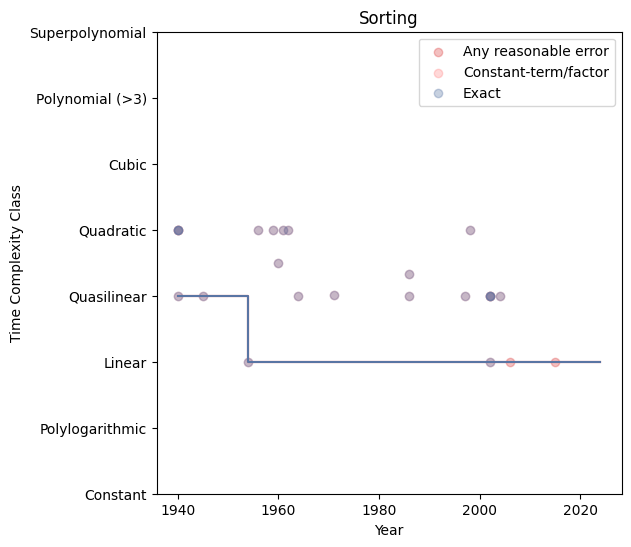

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


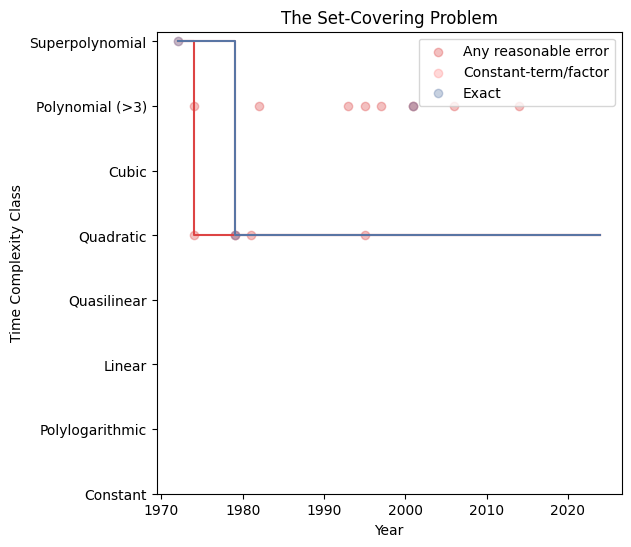

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


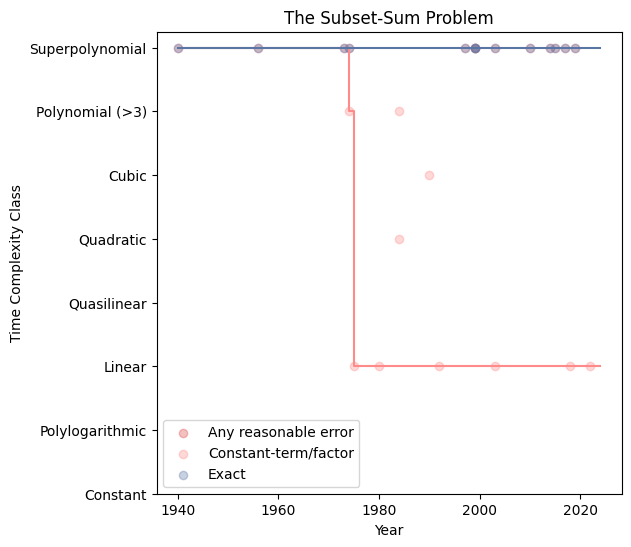

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


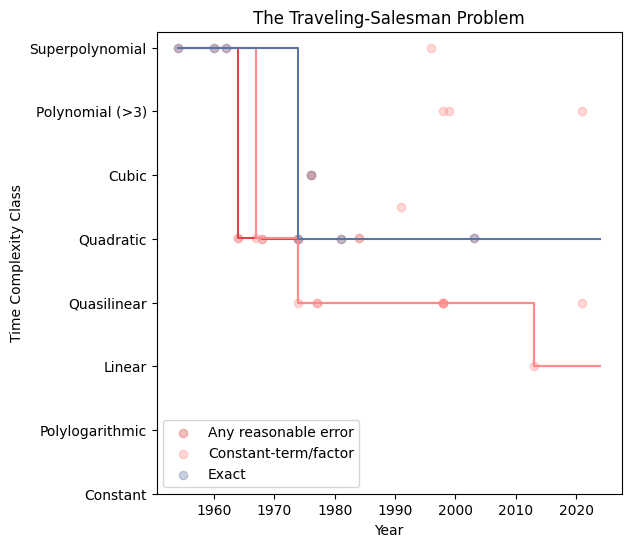

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  constant_factor['Best'] = fill_best(constant_factor)


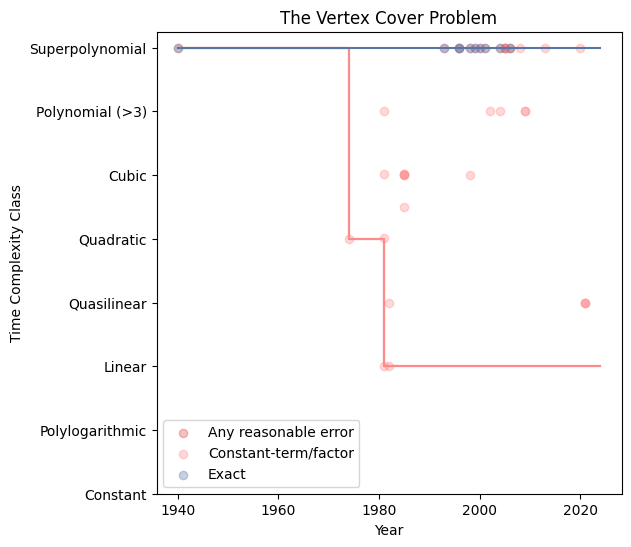

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/4098391932.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exact['Best'] = fill_best(exact)


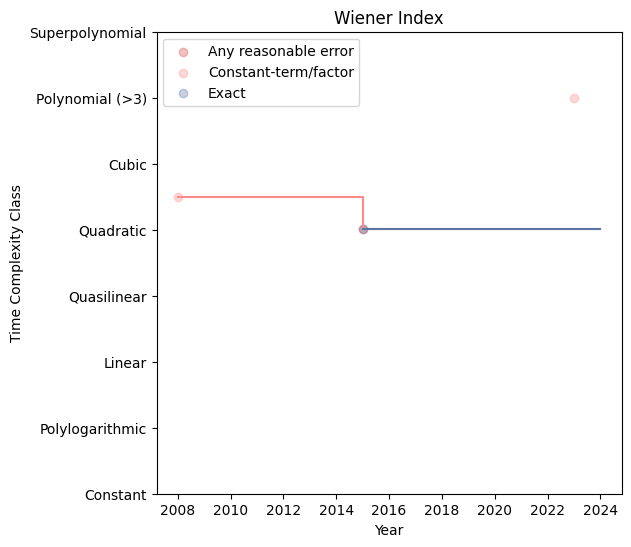

['All-Pairs Shortest Paths (APSP)',
 'The Traveling-Salesman Problem',
 'The Set-Covering Problem']

In [164]:
for family in approximation_algorithms['Family Name'].unique():
    plot_family(family)

# Change colors
# Fix labels to step 20 years

# Plot a group of 3 families side by side. With shared y-axis

# New Graph
["All-Pairs Shortest Paths (APSP)", "The Traveling-Salesman Problem" , "The Set-Covering Problem"] 

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/1880931830.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['Exact'] = family_df['Approximation Type (additive/multiplicative)'].isnull()
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12353/1880931830.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df['Constant Factor'] = (family_df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | \
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_12

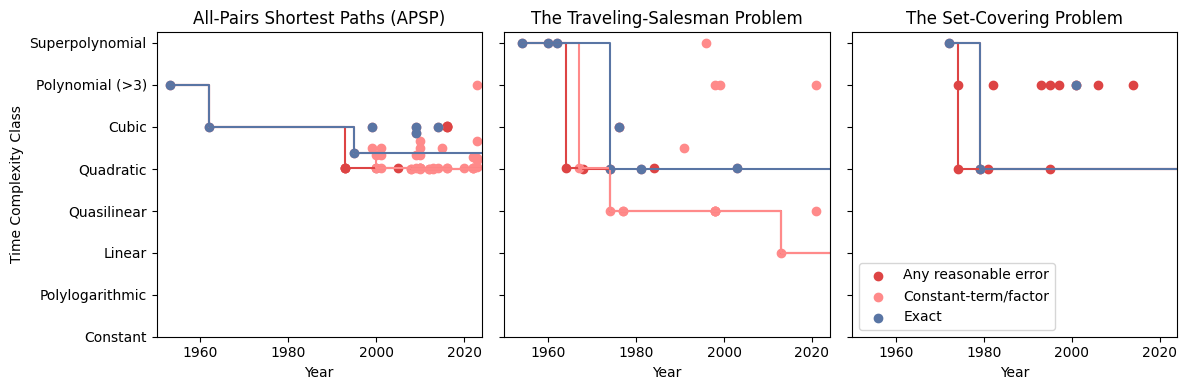

In [165]:

families = ["All-Pairs Shortest Paths (APSP)", "The Traveling-Salesman Problem", "The Set-Covering Problem"]

df = pd.concat([approximation_algorithms, sheet1], axis=0)

# Define the fill_best function outside the loop
def fill_best(df, column="Time Complexity Class"):
    best = []
    last_best = 99999
    for index, row in df.iterrows():
        if row[column] < last_best:
            best.append(True)
            last_best = row[column]
        else:
            best.append(False)
    return best

fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for idx, family in enumerate(families):
    family_df = df[df['Family Name'] == family]

    # Create column exact that is True if the algorithm has no Approximation Type
    family_df['Exact'] = family_df['Approximation Type (additive/multiplicative)'].isnull()

    # Create a column Constant Factor that is True if the algorithm has Approximation Factor Class (Mult) <= 2 or Approximation Factor Class (Add) <= 4.5 or is exact
    family_df['Constant Factor'] = (family_df['Approximation Factor Class (Mult)'].astype(float) <= 4.5) | \
                                   (family_df['Approximation Factor Class (Add)'].astype(float) <= 2) | \
                                   family_df['Exact']
    
    # Sort by year and time complexity
    family_df.sort_values(by=['Year', 'Time Complexity Class'], inplace=True)

    # Plot Time Complexity Class vs Year
    exact = family_df[family_df['Exact']]
    constant_factor = family_df[family_df['Constant Factor']]
    approximate = family_df[family_df['Constant Factor'] == False]

    exact['Best'] = fill_best(exact)
    constant_factor['Best'] = fill_best(constant_factor)
    family_df['Best'] = fill_best(family_df)

    axs[idx].scatter(approximate['Year'], approximate['Time Complexity Class'], label='Any reasonable error', color='#DD4444')
    axs[idx].scatter(constant_factor['Year'], constant_factor['Time Complexity Class'], label='Constant-term/factor', color='#ff8a8a')
    axs[idx].scatter(exact['Year'], exact['Time Complexity Class'], label='Exact', color='#5975A4')

    if len(approximate) > 0:
        best_approximate = family_df[family_df['Best']]
        last_row = best_approximate.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_approximate = pd.concat([best_approximate, last_row], ignore_index=True)
        axs[idx].step(best_approximate['Year'], best_approximate['Time Complexity Class'], where='post', color='#DD4444')

    if len(constant_factor) > 0:
        best_constant_factor = constant_factor[constant_factor['Best']]
        last_row = best_constant_factor.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_constant_factor = pd.concat([best_constant_factor, last_row], ignore_index=True)
        axs[idx].step(best_constant_factor['Year'], best_constant_factor['Time Complexity Class'], where='post', color='#ff8a8a')

    if len(exact) > 0:
        best_exact = exact[exact['Best']]
        last_row = best_exact.iloc[-1:].copy()
        last_row['Year'] = 2024
        best_exact = pd.concat([best_exact, last_row], ignore_index=True)
        axs[idx].step(best_exact['Year'], best_exact['Time Complexity Class'], where='post', color='#5975A4')

    axs[idx].set_title(family)
    axs[idx].set_xlabel('Year')

    # x-axis start on 1960 and end on 2024
    axs[idx].set_xlim(1950, 2024)

    if idx == 0:
        axs[idx].set_ylabel('Time Complexity Class')
  

plt.legend()

plt.yticks(np.arange(1, 9, 1), ['Constant', 'Polylogarithmic', 'Linear', 'Quasilinear', 'Quadratic', 'Cubic', 'Polynomial (>3)', 'Superpolynomial'])
plt.tight_layout()
plt.show()

# New Graph